In [1]:
from google.colab import files
uploaded = files.upload()

Saving simulated_multiverse_dataset.csv to simulated_multiverse_dataset.csv


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
# Load the dataset
df = pd.read_csv('simulated_multiverse_dataset.csv')
df.head()

,team_strength,enemy_strength,num_heroes,num_enemies,has_time_stone,has_surprise_element,terrain_advantage,team_coordination,enemy_mind_state,intel_accuracy,has_ironman,previous_failures,sacrifice_possible,diversion_success_rate,strategic_plan_complexity,universe_variability,enemy_stone_count,simulation_number,outcome
0,69.934283,68.643605,4,2,0,1,unknown,0.120206,aggressive,0.654791,0,3,0,0.782868,8.278652,0.647450,2,1,0
1,57.234714,68.198788,3,2,0,0,space,9.553673,defensive,0.142714,1,8,1,0.227836,0.091001,0.311073,2,2,0
2,NaN,48.065352,9,4,0,0,unknown,4.977799,neutral,0.392511,0,6,0,0.027715,9.683747,0.550768,6,3,0
3,90.460597,70.048647,7,1,1,0,earth,8.362684,neutral,0.566594,1,4,1,0.193337,3.760249,0.707407,1,4,1
4,55.316933,85.992436,4,2,1,0,space,5.484581,neutral,0.050374,0,5,0,0.400495,5.956984,0.022629,3,5,0


In [5]:
# Fix invalid entries
df["num_heroes"] = pd.to_numeric(df["num_heroes"], errors = "coerce")
df["enemy_mind_state"] = df["enemy_mind_state"].replace('???',np.nan)

In [6]:
# Define columns
numerical_features = [
    'team_strength', 'enemy_strength', 'num_heroes', 'num_enemies',
    'team_coordination', 'intel_accuracy', 'previous_failures',
    'diversion_success_rate', 'strategic_plan_complexity',
    'universe_variability', 'enemy_stone_count'
]

categorical_features = [
    'has_time_stone', 'has_surprise_element', 'terrain_advantage',
    'enemy_mind_state', 'has_ironman', 'sacrifice_possible'
]

In [8]:
# Split into X and Y
X = df.drop(columns = ['outcome', 'simulation_number'])
Y = df['outcome']

In [9]:
# Creating Pipelines
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('std_scaler',StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('cat_encoder',OneHotEncoder(handle_unknown= 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num',num_pipeline,numerical_features),
    ('cat',cat_pipeline,categorical_features)
])

In [27]:
# Apply tranformation

X_new = preprocessor.fit_transform(X)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score

In [28]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_new, Y, test_size=0.2, stratify=Y, random_state=42
)

In [29]:
# Train model and evaluate (start with Random Forest)
rf_model = RandomForestClassifier(class_weight='balanced',max_depth = 10, min_samples_leaf = 5, random_state=42)
rf_model.fit(X_train, Y_train)

y_predict = rf_model.predict(X_test)
print(y_predict)

print("🔍 Classification Report:\n")
print(classification_report(Y_test, y_predict))

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [30]:
# Comparison with LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print(y_pred)
print("🔍 Classification Report:\n")
print(classification_report(Y_test, y_pred))

[0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 

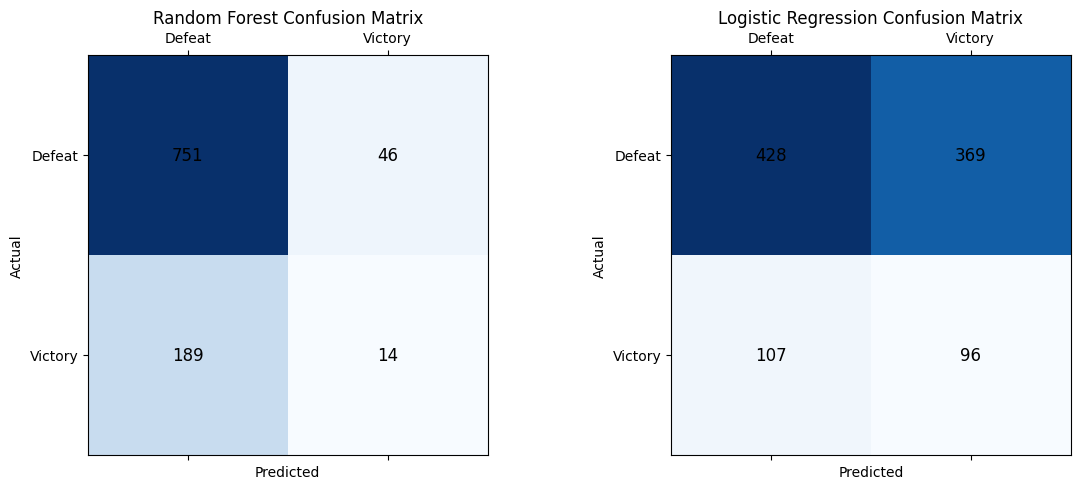

In [31]:
# Confusion matrices
rf_cm = confusion_matrix(Y_test, y_predict)
lr_cm = confusion_matrix(Y_test, y_pred)
# Plot confusion matrices side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for matrix, model, axis in zip([rf_cm, lr_cm], ["Random Forest", "Logistic Regression"], ax):
    cax = axis.matshow(matrix, cmap=plt.cm.Blues)
    axis.set_title(f"{model} Confusion Matrix")
    axis.set_xlabel("Predicted")
    axis.set_ylabel("Actual")
    axis.set_xticks([0, 1])
    axis.set_yticks([0, 1])
    axis.set_xticklabels(["Defeat", "Victory"])
    axis.set_yticklabels(["Defeat", "Victory"])
    for (i, j), val in np.ndenumerate(matrix):
        axis.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

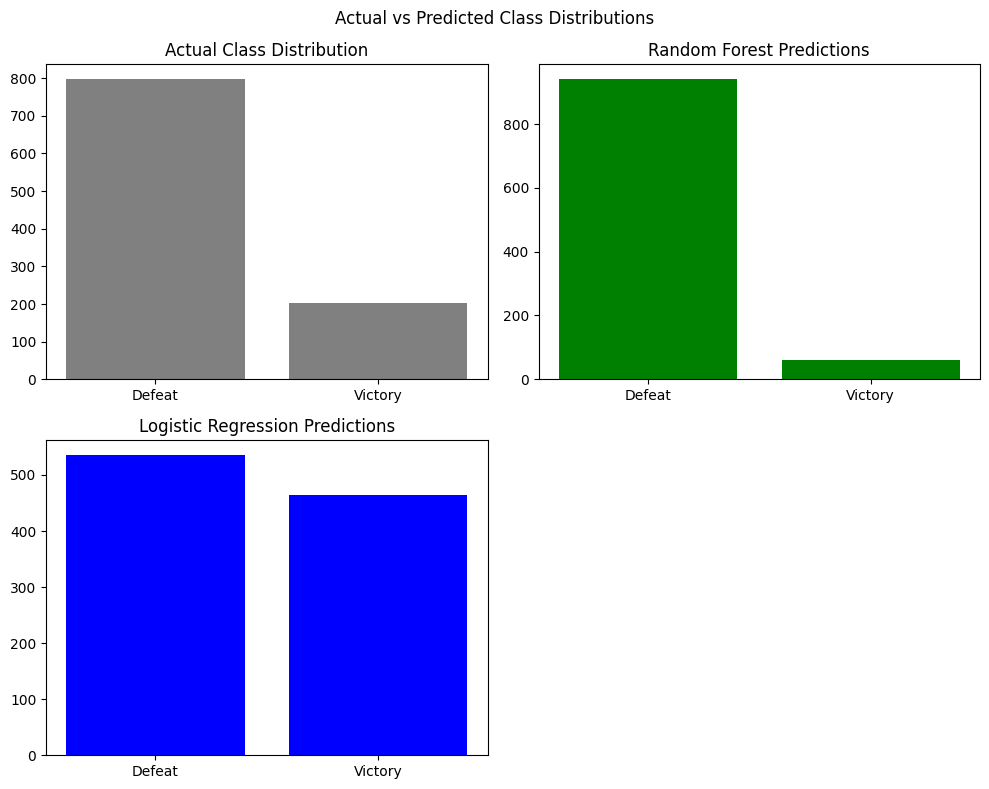

In [26]:
# Actual vs Predicted distribution
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Top: Actual
actual_counts = [sum(Y_test == 0), sum(Y_test == 1)]
ax[0, 0].bar([0, 1], actual_counts, color='gray')
ax[0, 0].set_title("Actual Class Distribution")
ax[0, 0].set_xticks([0, 1])
ax[0, 0].set_xticklabels(["Defeat", "Victory"])

# RF prediction
rf_counts = [sum(y_predict == 0), sum(y_predict == 1)]
ax[0, 1].bar([0, 1], rf_counts, color='green')
ax[0, 1].set_title("Random Forest Predictions")
ax[0, 1].set_xticks([0, 1])
ax[0, 1].set_xticklabels(["Defeat", "Victory"])

# LR prediction
lr_counts = [sum(y_pred == 0), sum(y_pred == 1)]
ax[1, 0].bar([0, 1], lr_counts, color='blue')
ax[1, 0].set_title("Logistic Regression Predictions")
ax[1, 0].set_xticks([0, 1])
ax[1, 0].set_xticklabels(["Defeat", "Victory"])

# Remove last unused plot
ax[1, 1].axis('off')

plt.suptitle("Actual vs Predicted Class Distributions")
plt.tight_layout()
plt.show()

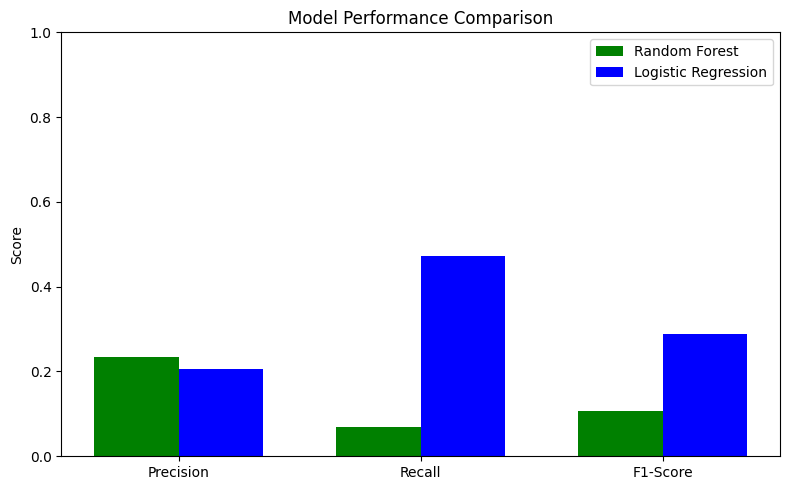

In [33]:
# Metrics comparison bar chart
rf_metrics = [
    precision_score(Y_test, y_predict),
    recall_score(Y_test, y_predict),
    f1_score(Y_test, y_predict)
]
lr_metrics = [
    precision_score(Y_test, y_pred),
    recall_score(Y_test, y_pred),
    f1_score(Y_test, y_pred)
]

labels = ["Precision", "Recall", "F1-Score"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, rf_metrics, width, label='Random Forest', color='green')
plt.bar(x + width/2, lr_metrics, width, label='Logistic Regression', color='blue')
plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()